## HR Analytics

CONTEXT:

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

*information taken from projects notes

## Problem Statement:

Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this?

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Errors and issues are more likely if you constantly have new workers.

### About dataset

Dataset has 35 columns including target columns as well. basis of the data we will prediction attrition or not. Attrition which is out target column has binery result yes and no. This is classification problem.

## Importing Important Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, accuracy_score

## Loading the Dataset

In [2]:
hr_df = pd.read_csv("HR-Employee-Attrition.csv")
hr_df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [3]:
hr_df.tail(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


## EDA

In [4]:
hr_df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [5]:
hr_df.shape

(1470, 35)

The dataset has 1470 rows and 35 columns out of which Attrition is our target column and it is in binary form.

In [6]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

There are no null values in the dataset. 9 columns are of object Dtype including target column. Rest 26 columns are of integer type.

In [7]:
hr_df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

## Statistics Summary

<AxesSubplot:>

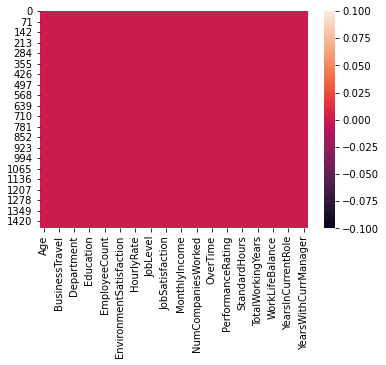

In [8]:
#To check missing values
sns.heatmap(hr_df.isnull())

There is no null values in the dataset.

In [9]:
# for numerical columns
hr_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


huge gap in 75% and maximum value therefore outliers are present.

### Univariate Analysis

#### Checking the categorical columns and Plotting graphs for better insight of Data Distribution

No     1233
Yes     237
Name: Attrition, dtype: int64


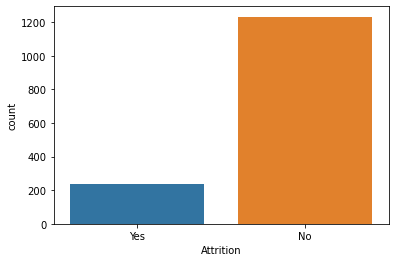

In [10]:
#Checking the target column
sns.countplot(x=hr_df['Attrition'])
print(hr_df['Attrition'].value_counts())

Here we can see that out of 1470 employees,237 employees, which is around 16% of total employee left their job due to some reasons whereas other 1233 employees, which is 84% of the employees preferred to continue their job at the company.

Also Here we can see there is huge difference between two types of Attrition. So the data is imbalanced. So we will apply SMOTE analysis before ML of final model.

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64


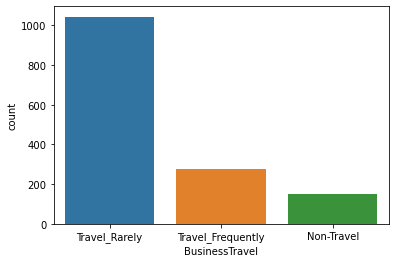

In [11]:
sns.countplot(x=hr_df['BusinessTravel'])
print(hr_df[ 'BusinessTravel'].value_counts())

Here business travel is divided in 3 categories with least number of non travellers. It has maximum number of employees who travels rarely.

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


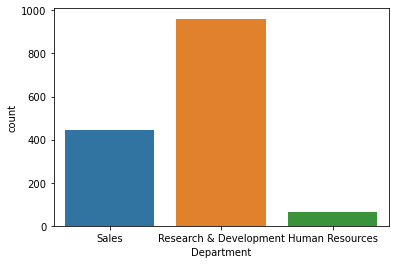

In [12]:
sns.countplot(x=hr_df['Department'])
print(hr_df['Department'].value_counts())

There are 3 different department in the dataset in which Research & Development has maximum number of employee.

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64


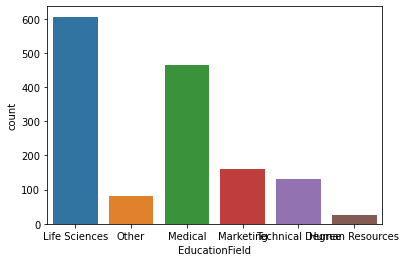

In [13]:
sns.countplot(x=hr_df['EducationField'])
print(hr_df['EducationField'].value_counts())

most peoples are from life sciences background and least are from human resource.

Male      882
Female    588
Name: Gender, dtype: int64


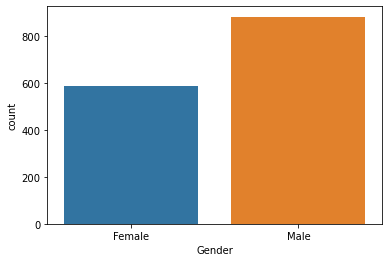

In [14]:
sns.countplot(x=hr_df['Gender'])
print(hr_df['Gender'].value_counts())

we can see male employee are more than female employee for attribution.

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64


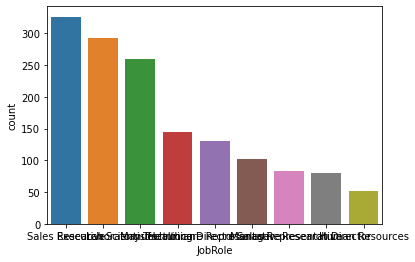

In [15]:
sns.countplot(x=hr_df['JobRole'])
print(hr_df['JobRole'].value_counts())

Most of the employee are from Sales department. And least are from HR.

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64


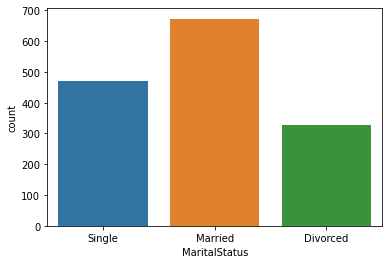

In [16]:
sns.countplot(x=hr_df['MaritalStatus'])
print(hr_df['MaritalStatus'].value_counts())

Most of the employees are married

No     1054
Yes     416
Name: OverTime, dtype: int64


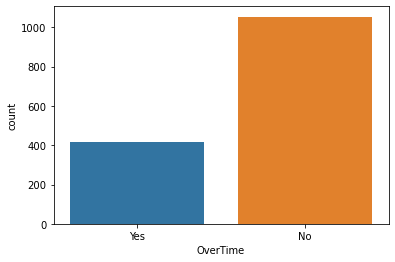

In [17]:
sns.countplot(x=hr_df['OverTime'])
print(hr_df['OverTime'].value_counts())

Only  416 employee works overtime. 

<AxesSubplot:xlabel='Over18', ylabel='count'>

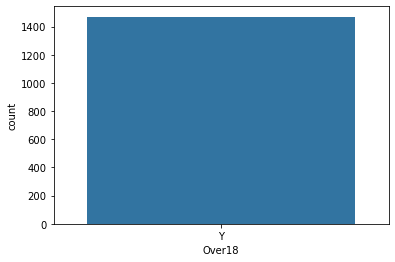

In [18]:
sns.countplot(x=hr_df['Over18'])

all the population are above 18 so we can drop this column as there is no use of this.

#### Analysis of the Rating Features

JobSatisfaction

EnvironmentSatisfaction

RelationshipSatisfaction

JobInvolvement

WorkLifeBalance

PerformanceRating

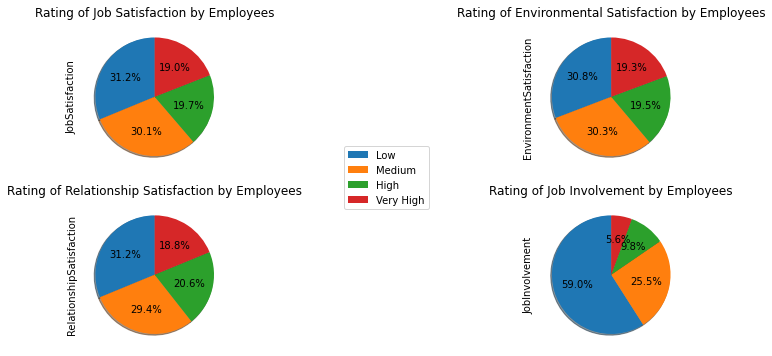

In [19]:
fig = plt.figure() 

ax1 = fig.add_subplot(221) 
ax2 = fig.add_subplot(222)  
ax3 = fig.add_subplot(223) 
ax4 = fig.add_subplot(224)  

labels = 'Low','Medium','High','Very High'

hr_df['JobSatisfaction'].astype(str).value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,ax=ax1) # add to subplot 2
ax1.set_title ('Rating of Job Satisfaction by Employees')
fig.legend(labels=labels,loc='center')

hr_df['EnvironmentSatisfaction'].astype(str).value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,ax=ax2) 
ax2.set_title('Rating of Environmental Satisfaction by Employees')

hr_df['RelationshipSatisfaction'].astype(str).value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,ax=ax3)
ax3.set_title('Rating of Relationship Satisfaction by Employees')

hr_df['JobInvolvement'].astype(str).value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,ax=ax4) 
ax4.set_title('Rating of Job Involvement by Employees')

plt.show()

Here we can see the rating features are low for each cases which also effects the performance of the employees.

Employees are 

Not Satisfied in their Job

Not Satisfied with their Work Environmnet

Not Satisfied in their Relationship

Not Getting involved in their job

### Bivariate Analysis

Age  Attrition
18   No            4
     Yes           4
19   Yes           6
     No            3
20   Yes           6
                  ..
57   No            4
58   No            9
     Yes           5
59   No           10
60   No            5
Name: Attrition, Length: 82, dtype: int64


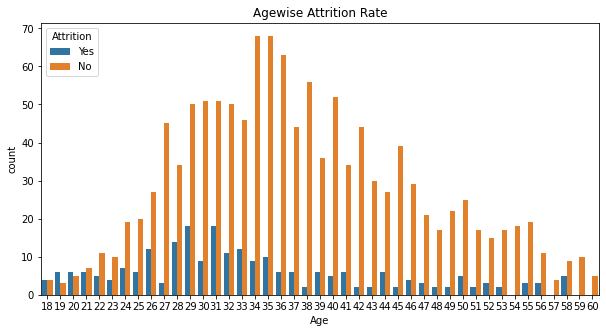

In [20]:
plt.figure(figsize=(10,5))
sns.countplot(x='Age',hue='Attrition',data=hr_df)
plt.title('Agewise Attrition Rate')
print(hr_df.groupby('Age')['Attrition'].value_counts())

Here we can see the employees between 25yrs to 35 yrs of age have highest attrition rate. 

Gender  Attrition
Female  No           501
        Yes           87
Male    No           732
        Yes          150
Name: Attrition, dtype: int64


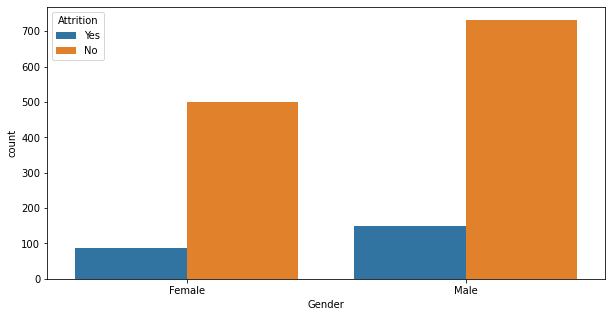

In [21]:
plt.figure(figsize=(10,5))
sns.countplot(x='Gender',hue='Attrition',data=hr_df)
print(hr_df.groupby('Gender')['Attrition'].value_counts())

Here we can see attrition doesnot much depende on sex of the employees.

Department              Attrition
Human Resources         No            51
                        Yes           12
Research & Development  No           828
                        Yes          133
Sales                   No           354
                        Yes           92
Name: Attrition, dtype: int64


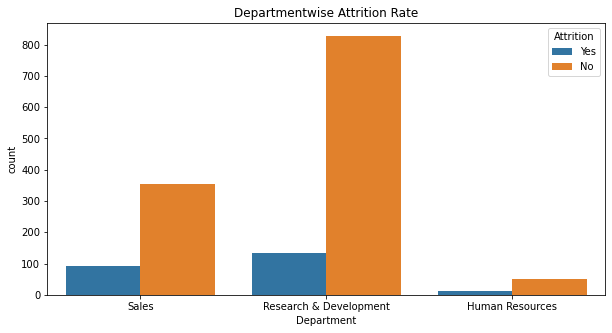

In [22]:
plt.figure(figsize=(10,5))
sns.countplot(x='Department',hue='Attrition',data=hr_df)
plt.title('Department​wise Attrition Rate')
print(hr_df.groupby('Department')['Attrition'].value_counts())

Highest attrition is in Research & Development department.

<AxesSubplot:xlabel='Age', ylabel='HourlyRate'>

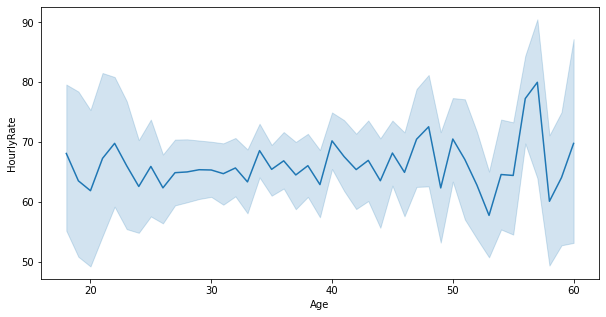

In [23]:
plt.figure(figsize=(10,5))
sns.lineplot(x='Age',y='HourlyRate',data=hr_df)

BusinessTravel     Attrition
Non-Travel         No           138
                   Yes           12
Travel_Frequently  No           208
                   Yes           69
Travel_Rarely      No           887
                   Yes          156
Name: Attrition, dtype: int64


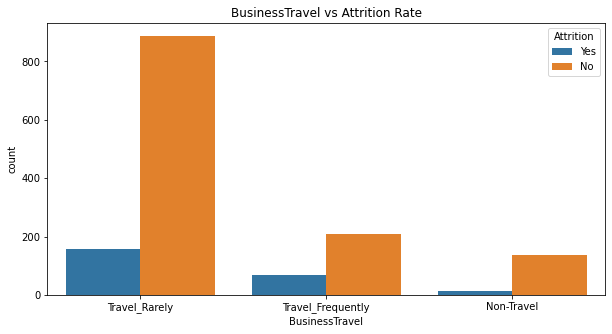

In [24]:
plt.figure(figsize=(10,5))
sns.countplot(x='BusinessTravel',hue='Attrition',data=hr_df)
plt.title('BusinessTravel vs Attrition Rate')
print(hr_df.groupby('BusinessTravel')['Attrition'].value_counts())

EducationField    Attrition
Human Resources   No            20
                  Yes            7
Life Sciences     No           517
                  Yes           89
Marketing         No           124
                  Yes           35
Medical           No           401
                  Yes           63
Other             No            71
                  Yes           11
Technical Degree  No           100
                  Yes           32
Name: Attrition, dtype: int64


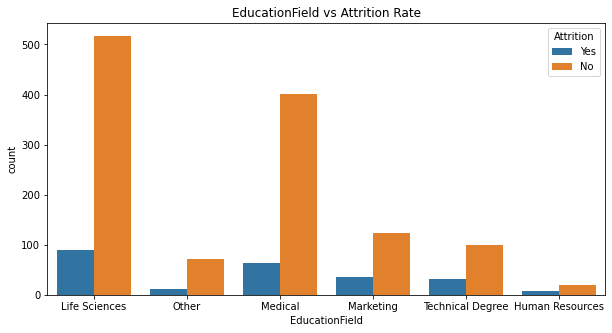

In [25]:
plt.figure(figsize=(10,5))
sns.countplot(x='EducationField',hue='Attrition',data=hr_df)
plt.title('EducationField vs Attrition Rate')
print(hr_df.groupby('EducationField')['Attrition'].value_counts())

people who are in life sciences have more attrition rate.

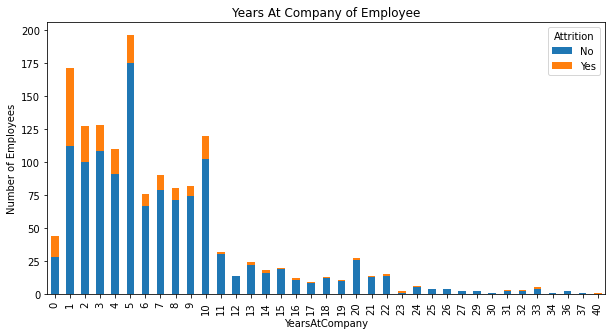

In [26]:
yac = hr_df.groupby("YearsAtCompany")['Attrition'].value_counts(normalize=False).unstack()

yac.plot(kind='bar', stacked='False',figsize=(10,5))

plt.title('Years At Company of Employee')
plt.ylabel('Number of Employees')
plt.show()

It is observed that the newly arriving employees quit their jobs most.

MonthlyIncome  Attrition
1009           Yes          1
1051           No           1
1052           No           1
1081           Yes          1
1091           Yes          1
                           ..
19859          Yes          1
19926          No           1
19943          No           1
19973          No           1
19999          No           1
Name: Attrition, Length: 1388, dtype: int64


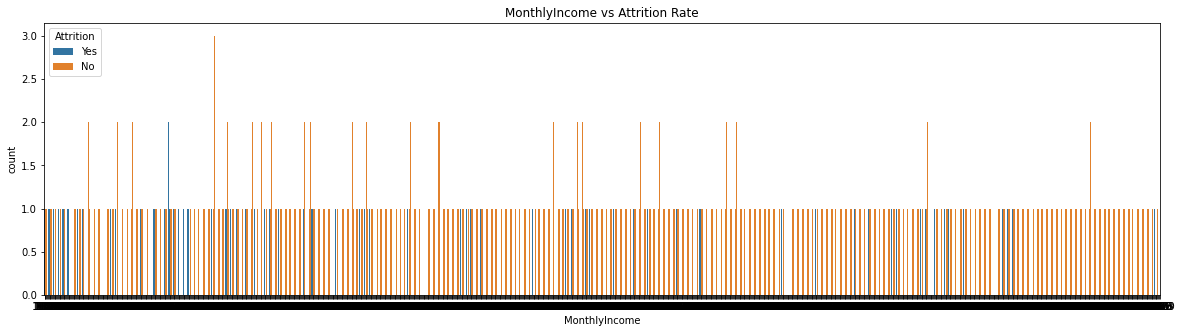

In [27]:
plt.figure(figsize=(20,5))
sns.countplot(x='MonthlyIncome',hue='Attrition',data=hr_df)
plt.title('MonthlyIncome vs Attrition Rate')
print(hr_df.groupby('MonthlyIncome')['Attrition'].value_counts())

Employees who left their jobs tend to have low monthly income than those who continued their job in the company

### Multivariate Analysis

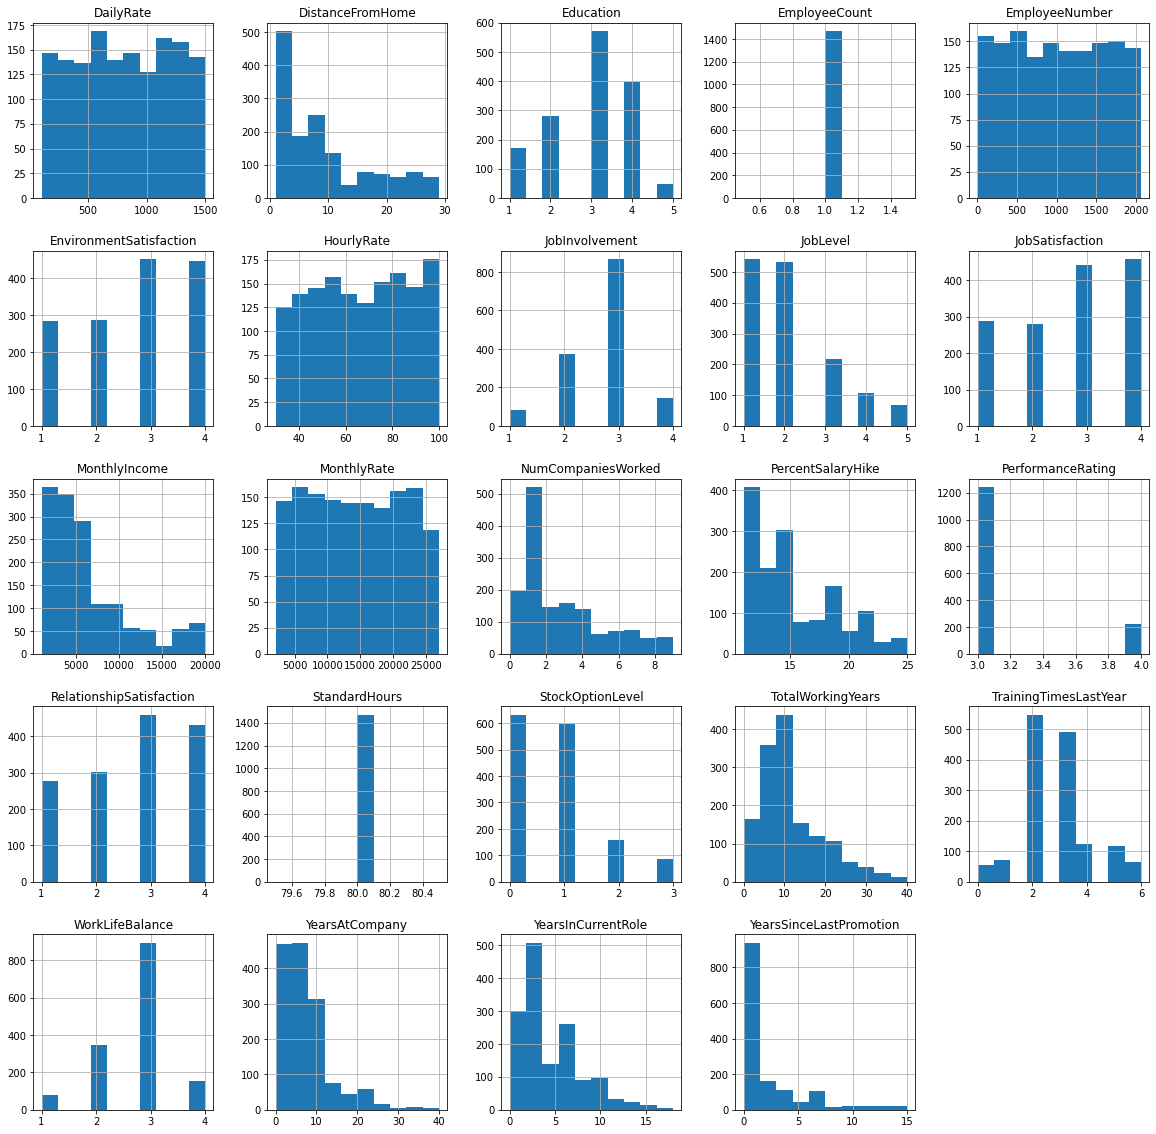

In [28]:
# distribution of the data
hr_df.iloc[:,1:-1].hist(figsize=(20,20));

### Converting categorical values to numerical values using label encoder

In [29]:
# use label encoder to change data type in type and region columns
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
list=['Attrition','BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime']
for val in list:
    hr_df[val]=le.fit_transform(hr_df[val].astype(str))

In [30]:
hr_df.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7


1. for Attrition column, "Yes":1,"No":0
2. for BusinessTravel column, "Non-Travel":0,"Travel_Frequently":1,"Travel_Rarely":2
3. for Department column,"Human Resources":0,"Research & Development":1,"Sales":2.
4. for Gender column,"Female":0,"Male":1
5. for MaritalStatus column, "Divorced":0,"Married":1,"Single":2
6. for OverTime column,"Yes":0,"No":1
7. for JobRole column,'Sales Executive': 7,'Research Scientist': 5,laboratory Technician': 2,'Manufacturing Director':   3,    'Healthcare Representative': 1,'Manager': 4,'Sales Representative': 8,'Research Director': 6,'Human Resources': 0
8. for EducationField column,Life Sciences': 2,'Other': 1,'Medical':4 ,'Marketing': 3,'Technical Degree': 5,   'HumanResources': 0

In [31]:
# Over18 and EmployeeCount have only one value thus it will not provide any information about the data.considering EmployeeNumber is emp ID thus deleting it.
hr_df.drop(columns =["Over18","EmployeeCount","EmployeeNumber","StandardHours"],axis =1, inplace = True)

In [32]:
hr_df.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7


Now there are 31 columns left

### Checking the correlation

In [33]:
hr_df.corr()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.024751,0.010661,-0.031882,-0.001686,0.208034,-0.040873,0.010146,-0.036311,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,0.000074,-0.056652,0.063991,0.077924,-0.031373,0.026846,-0.103369,0.029453,...,0.002889,-0.045872,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
BusinessTravel,0.024751,0.000074,1.000000,-0.004086,-0.009044,-0.024469,0.000757,0.023724,0.004174,-0.032981,...,-0.026341,-0.035986,-0.016727,0.034226,0.015240,-0.011256,-0.014575,-0.011497,-0.032591,-0.022636
DailyRate,0.010661,-0.056652,-0.004086,1.000000,0.007109,-0.004985,-0.016806,0.037709,0.018355,-0.011716,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Department,-0.031882,0.063991,-0.009044,0.007109,1.000000,0.017225,0.007996,0.013720,-0.019395,-0.041583,...,-0.024604,-0.022414,-0.012193,-0.015762,0.036875,0.026383,0.022920,0.056315,0.040061,0.034282
DistanceFromHome,-0.001686,0.077924,-0.024469,-0.004985,0.017225,1.000000,0.021042,0.002013,-0.016075,-0.001851,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,0.000757,-0.016806,0.007996,0.021042,1.000000,-0.039592,-0.027128,-0.016547,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,-0.040873,0.026846,0.023724,0.037709,0.013720,0.002013,-0.039592,1.000000,0.043163,-0.002504,...,-0.005614,-0.004378,-0.016185,-0.027848,0.049195,0.041191,-0.018692,-0.010506,0.002326,-0.004130
EnvironmentSatisfaction,0.010146,-0.103369,0.004174,0.018355,-0.019395,-0.016075,-0.027128,0.043163,1.000000,0.000508,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
Gender,-0.036311,0.029453,-0.032981,-0.011716,-0.041583,-0.001851,-0.016547,-0.002504,0.000508,1.000000,...,-0.013859,0.022868,0.012716,-0.046881,-0.038787,-0.002753,-0.029747,-0.041483,-0.026985,-0.030599


<AxesSubplot:>

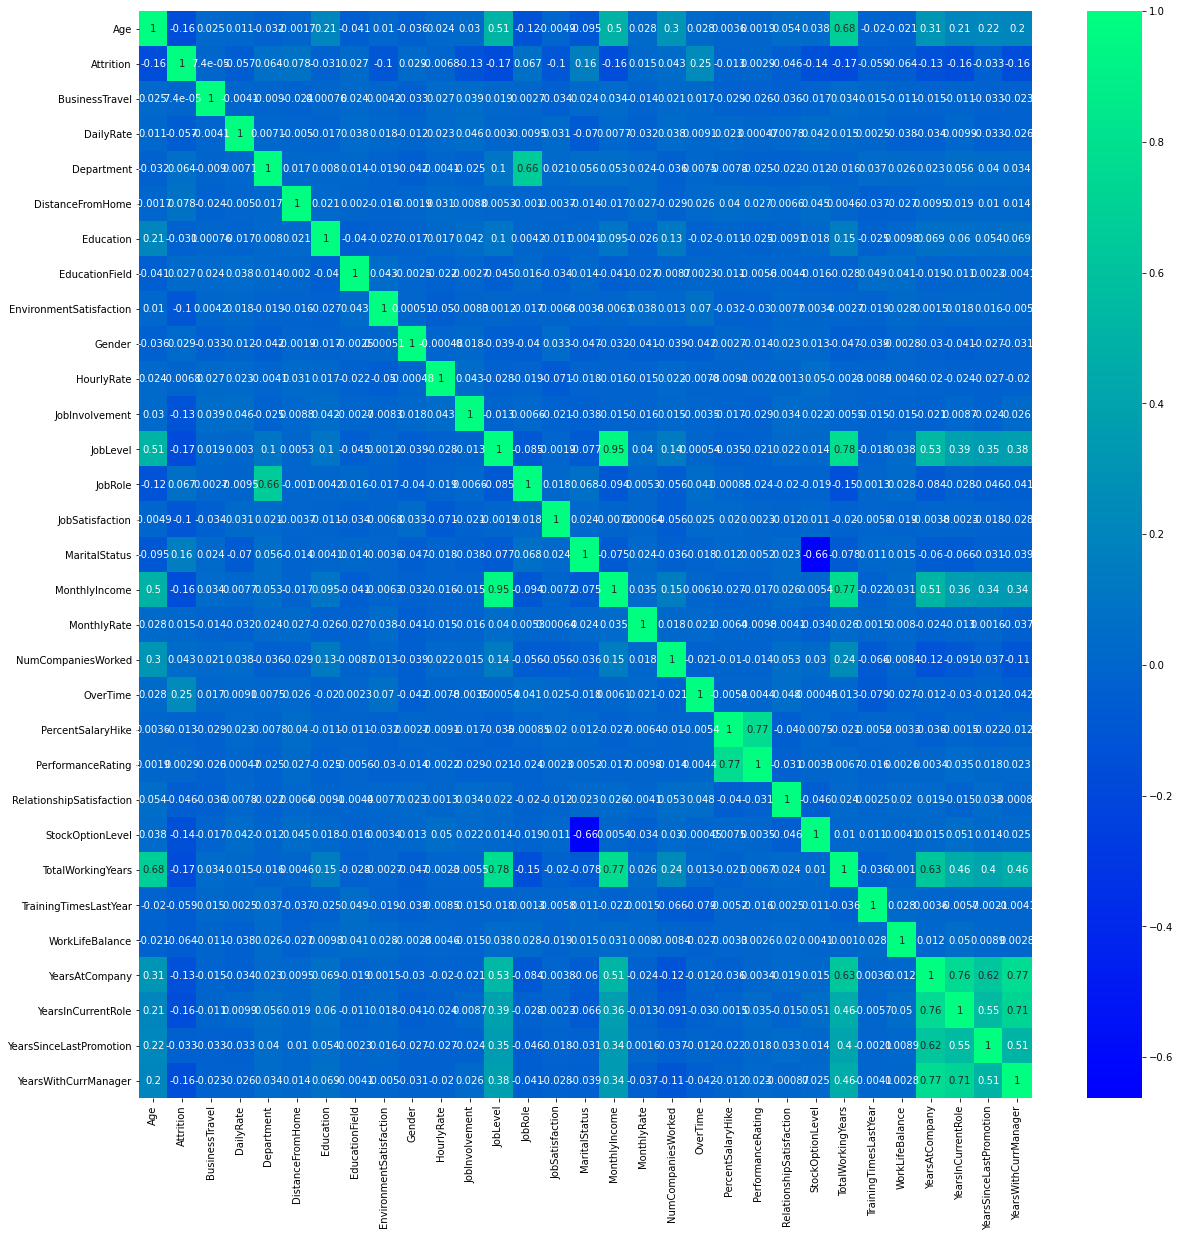

In [34]:
#Checking with heatmap
plt.figure(figsize=(20,20))
sns.heatmap(hr_df.corr(),annot=True,cmap='winter')

None of the column is highly correlated with Attrition. So many columns are negatively correlated with Attrition.

Job role is highly correlated with department , job level is highly positively correlated with monthlyincome and totalworkingyear, total working year is correlated with Age, job level,monhtly income. year of complany correlated with year at current role and yearwith current manager.

## Check for Skewness

In [35]:
x=hr_df.drop('Attrition', axis=1)
y=hr_df['Attrition']
x

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1102,2,1,2,1,2,0,94,...,3,1,0,8,0,1,6,4,0,5
1,49,1,279,1,8,1,1,3,1,61,...,4,4,1,10,3,3,10,7,1,7
2,37,2,1373,1,2,2,4,4,1,92,...,3,2,0,7,3,3,0,0,0,0
3,33,1,1392,1,3,4,1,4,0,56,...,3,3,0,8,3,3,8,7,3,0
4,27,2,591,1,2,1,3,1,1,40,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,1,884,1,23,2,3,3,1,41,...,3,3,1,17,3,3,5,2,0,3
1466,39,2,613,1,6,1,3,4,1,42,...,3,1,1,9,5,3,7,7,1,7
1467,27,2,155,1,4,3,1,2,1,87,...,4,2,1,6,0,3,6,2,0,3
1468,49,1,1023,2,2,3,3,4,1,63,...,3,4,0,17,3,2,9,6,0,8


In [36]:
# Cheking Skewness
hr_df.skew().sort_values(ascending=False)

YearsSinceLastPromotion     1.984290
PerformanceRating           1.921883
Attrition                   1.844366
YearsAtCompany              1.764529
MonthlyIncome               1.369817
TotalWorkingYears           1.117172
NumCompaniesWorked          1.026471
JobLevel                    1.025401
StockOptionLevel            0.968980
OverTime                    0.964489
DistanceFromHome            0.958118
YearsInCurrentRole          0.917363
YearsWithCurrManager        0.833451
PercentSalaryHike           0.821128
TrainingTimesLastYear       0.553124
EducationField              0.550371
Age                         0.413286
Department                  0.172231
MonthlyRate                 0.018578
DailyRate                  -0.003519
HourlyRate                 -0.032311
MaritalStatus              -0.152175
Education                  -0.289681
RelationshipSatisfaction   -0.302828
EnvironmentSatisfaction    -0.321654
JobSatisfaction            -0.329672
JobRole                    -0.357270
G

In [37]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson') 
X_power=pt.fit_transform(x)
df=pd.DataFrame(X_power,columns=x.columns)

In [38]:
type(X_power)

numpy.ndarray

In [39]:
x=pd.DataFrame(X_power, columns=x.columns)

In [40]:
x

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.522140,0.635468,0.759289,1.377454,-1.494085,-0.916940,-0.960488,-0.706596,-1.224745,1.354630,...,-7.632783e-17,-1.529513,-1.087933,-0.244305,-2.579073,-2.144446,0.139692,0.205562,-1.094862,0.490147
1,1.276411,-1.392865,-1.334597,-0.472127,0.243416,-1.771185,-0.960488,0.208597,0.816497,-0.210675,...,4.232725e-16,1.229016,0.548969,0.052495,0.217384,0.276821,0.762660,0.883888,0.096854,0.909635
2,0.102091,0.635468,1.340365,-0.472127,-1.031215,-0.916940,1.247620,1.209516,0.816497,1.263094,...,-7.632783e-17,-0.700130,-1.087933,-0.410500,0.217384,0.276821,-2.229592,-1.596434,-1.094862,-1.550156
3,-0.353971,-1.392865,1.379936,-0.472127,-0.700347,1.082871,-0.960488,1.209516,-1.224745,-0.460197,...,-7.632783e-17,0.225164,-1.087933,-0.244305,0.217384,0.276821,0.482432,0.883888,0.905592,-1.550156
4,-1.123755,0.635468,-0.453941,-0.472127,-1.031215,-1.771185,0.697390,-1.518118,0.816497,-1.289301,...,-7.632783e-17,1.229016,0.548969,-0.592063,0.217384,0.276821,-0.951540,-0.446645,0.607464,-0.406881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,-0.008279,-1.392865,0.264672,-0.472127,1.407126,-0.916940,0.697390,0.208597,0.816497,-1.235882,...,-7.632783e-17,0.225164,0.548969,0.859893,0.217384,0.276821,-0.066114,-0.446645,-1.094862,-0.053000
1466,0.316210,0.635468,-0.397219,-0.472127,-0.050827,-1.771185,0.697390,1.209516,0.816497,-1.182703,...,-7.632783e-17,-1.529513,0.548969,-0.090665,1.615639,0.276821,0.320677,0.883888,0.096854,0.909635
1467,-1.123755,0.635468,-1.751713,-0.472127,-0.442291,0.040522,-0.960488,-0.706596,0.816497,1.032601,...,4.232725e-16,-0.700130,0.548969,-0.592063,-2.579073,0.276821,0.139692,-0.446645,-1.094862,-0.053000
1468,1.276411,-1.392865,0.583235,1.377454,-1.031215,0.040522,0.697390,1.209516,0.816497,-0.111945,...,-7.632783e-17,1.229016,-1.087933,0.859893,0.217384,-1.108624,0.628829,0.682995,-1.094862,1.090110


In [41]:
# Again Cheking Skewness if it has been removed 
x.skew().sort_values(ascending=False)

OverTime                    0.964489
YearsSinceLastPromotion     0.212129
PercentSalaryHike           0.116250
JobLevel                    0.103624
StockOptionLevel            0.087019
TrainingTimesLastYear       0.058058
NumCompaniesWorked          0.014814
Department                  0.013801
MonthlyIncome               0.000000
PerformanceRating           0.000000
DistanceFromHome           -0.007468
Age                        -0.007603
EducationField             -0.008386
YearsAtCompany             -0.008683
TotalWorkingYears          -0.010653
WorkLifeBalance            -0.012286
JobInvolvement             -0.020365
YearsInCurrentRole         -0.060849
YearsWithCurrManager       -0.067565
Education                  -0.099881
HourlyRate                 -0.106461
MaritalStatus              -0.156911
MonthlyRate                -0.184087
RelationshipSatisfaction   -0.193634
DailyRate                  -0.196160
EnvironmentSatisfaction    -0.205395
JobSatisfaction            -0.212815
J

## Check For Outliers

Age                            AxesSubplot(0.125,0.772143;0.110714x0.107857)
Attrition                   AxesSubplot(0.257857,0.772143;0.110714x0.107857)
BusinessTravel              AxesSubplot(0.390714,0.772143;0.110714x0.107857)
DailyRate                   AxesSubplot(0.523571,0.772143;0.110714x0.107857)
Department                  AxesSubplot(0.656429,0.772143;0.110714x0.107857)
DistanceFromHome            AxesSubplot(0.789286,0.772143;0.110714x0.107857)
Education                      AxesSubplot(0.125,0.642714;0.110714x0.107857)
EducationField              AxesSubplot(0.257857,0.642714;0.110714x0.107857)
EnvironmentSatisfaction     AxesSubplot(0.390714,0.642714;0.110714x0.107857)
Gender                      AxesSubplot(0.523571,0.642714;0.110714x0.107857)
HourlyRate                  AxesSubplot(0.656429,0.642714;0.110714x0.107857)
JobInvolvement              AxesSubplot(0.789286,0.642714;0.110714x0.107857)
JobLevel                       AxesSubplot(0.125,0.513286;0.110714x0.107857)

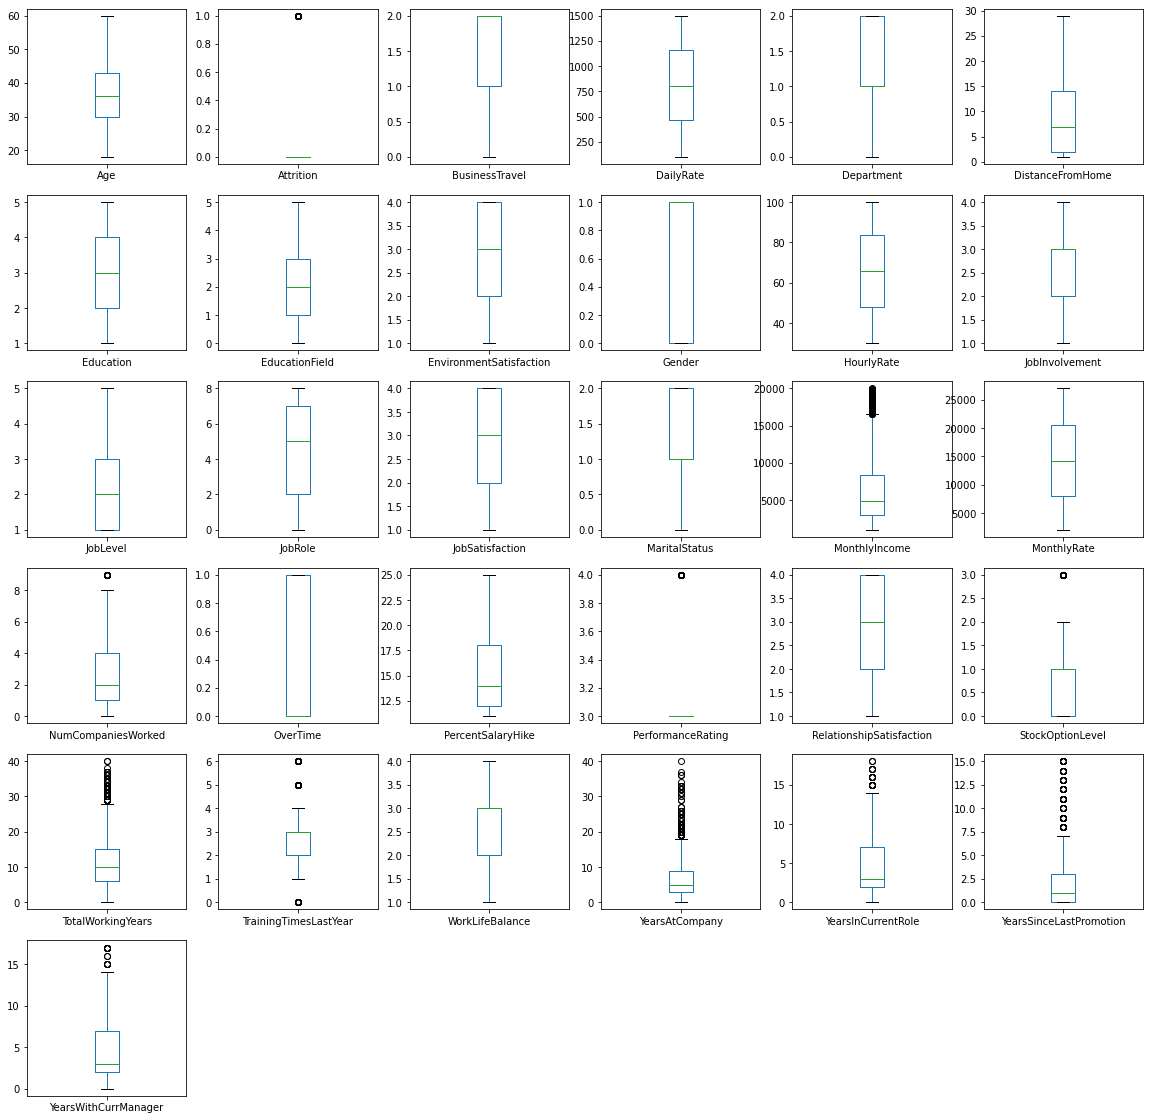

In [42]:
hr_df.plot(kind='box',subplots=True,layout=(6,6),figsize=(20,20))

There are outliers in MonthlyIncome, Stock option Level,Total Working years,Training Times last year, Years at company,years in current role and Years with current manager.

#### Removing The Outliers

In [43]:
from scipy.stats import zscore

z=np.abs(zscore(hr_df))
z

array([[0.4463504 , 2.28090588, 0.59004834, ..., 0.0632959 , 0.67914568,
        0.24583399],
       [1.32236521, 0.4384223 , 0.91319439, ..., 0.76499762, 0.36871529,
        0.80654148],
       [0.008343  , 2.28090588, 0.59004834, ..., 1.16768726, 0.67914568,
        1.15593471],
       ...,
       [1.08667552, 0.4384223 , 0.59004834, ..., 0.61549158, 0.67914568,
        0.31487349],
       [1.32236521, 0.4384223 , 0.91319439, ..., 0.48889978, 0.67914568,
        1.08689522],
       [0.32016256, 0.4384223 , 0.59004834, ..., 0.33939374, 0.36871529,
        0.59522723]])

In [44]:
z.shape

(1470, 31)

In [45]:
threshold=3
print(np.where(z>3))

(array([  28,   45,   62,   62,   63,   64,   85,   98,   98,  110,  123,
        123,  123,  126,  126,  126,  153,  178,  187,  187,  190,  190,
        218,  231,  231,  237,  237,  270,  270,  281,  326,  386,  386,
        401,  411,  425,  425,  427,  445,  466,  473,  477,  535,  561,
        561,  584,  592,  595,  595,  595,  616,  624,  635,  653,  653,
        677,  686,  701,  716,  746,  749,  752,  799,  838,  861,  861,
        875,  875,  894,  914,  914,  918,  922,  926,  926,  937,  956,
        962,  976,  976, 1008, 1024, 1043, 1078, 1078, 1086, 1086, 1093,
       1111, 1116, 1116, 1135, 1138, 1138, 1156, 1184, 1221, 1223, 1242,
       1295, 1301, 1301, 1303, 1327, 1331, 1348, 1351, 1401, 1414, 1430],
      dtype=int64), array([30, 29, 27, 29, 28, 29, 24, 24, 27, 29, 28, 29, 30, 24, 27, 29, 30,
       29, 24, 30, 27, 28, 29, 28, 30, 27, 29, 24, 27, 28, 29, 29, 30, 24,
       27, 27, 29, 29, 24, 28, 27, 27, 29, 27, 30, 29, 27, 24, 27, 29, 30,
       24, 30, 27, 29, 

In [46]:
hr_new=hr_df[(z<3).all(axis=1)]
hr_new

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,3,1,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,4,1,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,2,1,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,4,1,...,3,4,0,17,3,2,9,6,0,8


In [47]:
print(hr_df.shape)
print(hr_new.shape)

(1470, 31)
(1387, 31)


Percentage Data Loss

In [48]:
loss_percent=(1470-1386)/1470*100
print(loss_percent)

5.714285714285714


5.714% data is lost.

## Handling imbalance data by SMOTE analysis

In [49]:
# Seprating data into X and y
x_new = hr_new.drop("Attrition",axis =1)
y_new= hr_new["Attrition"]

In [50]:
# implementing oversampling for handling imbalance data
from imblearn.over_sampling import SMOTE
smt=SMOTE()
sm_x,sm_y=smt.fit_resample(x_new,y_new)
#y.value_counts()
sm_y.value_counts()


0    1158
1    1158
Name: Attrition, dtype: int64

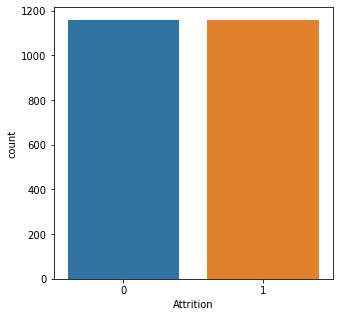

In [51]:
plt.figure(figsize=(5,5))
sns.countplot(sm_y)
plt.show()

Now the data is balanced.

## Modelling

In [52]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
sm_x=scale.fit_transform(sm_x)
sm_x

array([[ 0.68969505,  0.73730593,  0.83923258, ...,  0.25526953,
        -0.67920399,  0.61175312],
       [ 1.61743355, -0.77652433, -1.33465626, ...,  1.25901185,
        -0.24224942,  1.27614712],
       [ 0.22582581,  0.73730593,  1.55505745, ..., -1.08305357,
        -0.67920399, -1.0492319 ],
       ...,
       [-1.97755311, -2.29035459, -1.39012608, ..., -1.08305357,
        -0.67920399, -1.0492319 ],
       [-0.58594537, -0.77652433,  0.29774143, ..., -0.7484728 ,
        -0.24224942, -1.0492319 ],
       [-1.51368386, -0.77652433,  1.45204206, ..., -0.41389202,
        -0.24224942, -0.38483789]])

In [95]:
maxAcc = 0
maxRS = 0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(sm_x,sm_y,random_state=i,test_size=0.20)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predrf= LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print('Best score is',maxAcc,'on Random State',maxRS)

Best score is 0.8685344827586207 on Random State 75


In [96]:
# Make input and output variables into train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(sm_x,sm_y,random_state=75,test_size=0.20)

In [97]:
# Checking train and test data size
print(x_train.shape,'\t',x_test.shape)

(1852, 30) 	 (464, 30)


In [98]:
print(y_train.shape,'\t',y_test.shape)

(1852,) 	 (464,)


In [99]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

In [100]:
lg=LogisticRegression()
lg.fit(x_train,y_train)

LogisticRegression()

In [101]:
pred=lg.predict(x_test)
print(pred)

[1 0 0 1 0 0 1 0 0 1 0 0 0 1 1 1 1 0 1 1 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 1
 0 0 1 0 1 0 0 0 1 0 1 1 1 1 1 1 1 0 0 1 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 0 1
 1 1 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 1 1 1 1 0 1 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 1 1 1 0 1 0 1 0 1 0 0 1 1 0 0 0 1 0 0 1 0
 1 0 1 0 0 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 1 1 1 1 0 1 1 0 1 1 0 1
 1 0 0 0 1 1 0 0 1 1 1 0 0 1 1 0 1 1 0 0 1 1 0 1 0 0 1 0 1 0 0 0 1 1 1 1 0
 1 0 1 1 1 1 1 1 0 1 0 1 0 0 0 0 0 0 1 1 0 1 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0
 0 0 1 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0 1 0 1 1
 0 0 0 1 1 1 1 0 1 1 1 0 0 0 1 0 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 0 1 1 1 1 0
 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 1 1 1 1 0 1 1 1
 0 1 0 0 1 1 1 0 1 0 0 0 1 0 1 1 0 1 1 0 1 1 0 0 1 1 0 1 1 0 0 1 0 0 1 1 1
 0 0 1 1 0 0 0 0 1 1 0 1 0 1 0 1 0 1 1 1 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 0 1 1 0 1 1 0 0 1 0 1 0 0 0 1 0 1]


In [102]:
print('accuracy_score:' , accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy_score: 0.8685344827586207
[[212  31]
 [ 30 191]]
              precision    recall  f1-score   support

           0       0.88      0.87      0.87       243
           1       0.86      0.86      0.86       221

    accuracy                           0.87       464
   macro avg       0.87      0.87      0.87       464
weighted avg       0.87      0.87      0.87       464



### Checking with different algorithms

In [103]:
import sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

model=[LogisticRegression(),GaussianNB(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier(),]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy score of',m, 'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

Accuracy score of LogisticRegression() is:
0.8685344827586207
[[212  31]
 [ 30 191]]
              precision    recall  f1-score   support

           0       0.88      0.87      0.87       243
           1       0.86      0.86      0.86       221

    accuracy                           0.87       464
   macro avg       0.87      0.87      0.87       464
weighted avg       0.87      0.87      0.87       464



Accuracy score of GaussianNB() is:
0.75
[[169  74]
 [ 42 179]]
              precision    recall  f1-score   support

           0       0.80      0.70      0.74       243
           1       0.71      0.81      0.76       221

    accuracy                           0.75       464
   macro avg       0.75      0.75      0.75       464
weighted avg       0.76      0.75      0.75       464



Accuracy score of SVC() is:
0.9267241379310345
[[224  19]
 [ 15 206]]
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       243
           1   

We are getting highest accuracy with SVC 

In [104]:
# Finding out best paramter using GridsearchCV
from sklearn.model_selection import GridSearchCV
parameters={'kernel':['linear','rbf','poly','sigmoid'],'C':[0,1,2,3,4,5,6,7,8,9,10,11,12]}
svc=SVC()
gs=GridSearchCV(svc,parameters)
gs.fit(sm_x,sm_y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']})

In [105]:
print(gs.best_params_)

{'C': 10, 'kernel': 'rbf'}


In [106]:
#Using SVC model with best results
sv=SVC(kernel='rbf',C=10)
sv.fit(x_train,y_train)
sv.score(x_train,y_train)
predsv=sv.predict(x_test)
print('Accuracy score of',sv, 'is:')
print(accuracy_score(y_test,predsv))
print(confusion_matrix(y_test,predsv))
print(classification_report(y_test,predsv))
print('\n')

Accuracy score of SVC(C=10) is:
0.9482758620689655
[[225  18]
 [  6 215]]
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       243
           1       0.92      0.97      0.95       221

    accuracy                           0.95       464
   macro avg       0.95      0.95      0.95       464
weighted avg       0.95      0.95      0.95       464





## Using Ensemble Technique to boostup score

In [107]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=100,random_state=75,criterion='gini')
#RandomForestClassifier(100)---Default
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.9461206896551724
[[230  13]
 [ 12 209]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       243
           1       0.94      0.95      0.94       221

    accuracy                           0.95       464
   macro avg       0.95      0.95      0.95       464
weighted avg       0.95      0.95      0.95       464



In [120]:
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier(n_estimators=100,random_state=75,base_estimator=sv,algorithm='SAMME',learning_rate=0.01)
ad.fit(x_train,y_train)
ad_pred=ad.predict(x_test)
print(accuracy_score(y_test,ad_pred))
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

0.47629310344827586
[[  0 243]
 [  0 221]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       243
           1       0.48      1.00      0.65       221

    accuracy                           0.48       464
   macro avg       0.24      0.50      0.32       464
weighted avg       0.23      0.48      0.31       464



In [109]:
# Finding out best paramter using GridsearchCV
from sklearn.model_selection import GridSearchCV
parameters={'random_state':range(35,100)}
gc=GridSearchCV(sv,parameters)
gc.fit(sm_x,sm_y)
gc.best_params_

{'random_state': 35}

## Hyperparameter Tuning

In [110]:
RF = RandomForestClassifier() # Randomforest instance
from sklearn.model_selection import RandomizedSearchCV,cross_val_score

# we are checking best parameter which suited most for the model

para = {
        "criterion":["gini","entropy"],
        "max_features" : ["auto", "sqrt", "log2"],
        "min_samples_split" :[2,4,6,8], 
        "max_depth" :[2,3,4,5],
        "min_samples_leaf":[3,5,8,10],
        "max_samples" :[0.2,0.3,0.4,0.5]
}

grid = RandomizedSearchCV(RF, para, scoring= "accuracy" )

grid.fit(x_train,y_train)
print("score",grid.best_score_)
print("best parameter",grid.best_params_)
print("best estimator",grid.best_estimator_)
grid_pred=grid.best_estimator_.predict(x_test) # predicting with best parameters

score 0.8326174692212428
best parameter {'min_samples_split': 4, 'min_samples_leaf': 3, 'max_samples': 0.4, 'max_features': 'log2', 'max_depth': 5, 'criterion': 'gini'}
best estimator RandomForestClassifier(max_depth=5, max_features='log2', max_samples=0.4,
                       min_samples_leaf=3, min_samples_split=4)


## Cross Validation

In [121]:
best_parameter_RF = RandomForestClassifier(min_samples_split= 4, min_samples_leaf = 3, max_samples =0.4, max_features = 'log2', max_depth = 5, criterion = 'gini')

for i in range(2,7):
    cv = cross_val_score(best_parameter_RF,sm_x,sm_y,cv=i)
    print(f'at CV {i} The mean is  {cv.mean()} and the SD is {cv.std()}') 

at CV 2 The mean is  0.8385146804835923 and the SD is 0.03108808290155446
at CV 3 The mean is  0.8337651122625216 and the SD is 0.04518644370276731
at CV 4 The mean is  0.8354922279792746 and the SD is 0.05899275910295336
at CV 5 The mean is  0.8247598123184628 and the SD is 0.07208950384366851
at CV 6 The mean is  0.8380829015544041 and the SD is 0.06157506645991527


Observation

since Randomforest worked well out of all other model, so we have done the hyperparameter tuning to set the best parameter for final model. Now i have checked the best CV as well that at level of CV is generated the best score and we have found CV 6 is at best

In [112]:
# Cross validate of RandomForestClassifier using cv=6
from sklearn.model_selection import cross_val_score
score=cross_val_score(rf,sm_x,sm_y,cv=6,scoring='accuracy')
print('Score:', score)
print('Mean Score:', score.mean())
print('Standard Deviation:', score.std())

Score: [0.73834197 0.92746114 0.94041451 0.9507772  0.94041451 0.93005181]
Mean Score: 0.9045768566493955
Standard Deviation: 0.07473268822844518


## AUC ROC Curve

In [113]:
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt

from sklearn.metrics import roc_auc_score

In [114]:
y_pred_prob=rf.predict_proba(x_test)[:,1]
y_pred_prob

array([0.97, 0.13, 0.16, 0.38, 0.36, 0.29, 0.97, 0.12, 0.58, 0.41, 0.13,
       0.77, 0.27, 0.98, 0.54, 0.88, 0.9 , 0.27, 0.91, 0.51, 0.13, 0.22,
       0.73, 0.43, 0.53, 0.24, 0.91, 0.12, 0.95, 0.11, 0.96, 0.81, 0.83,
       0.12, 0.74, 0.97, 1.  , 0.74, 0.35, 0.81, 0.21, 0.34, 0.35, 0.25,
       0.18, 0.92, 0.13, 0.93, 0.92, 0.87, 0.89, 0.52, 0.35, 0.9 , 0.33,
       0.21, 0.53, 0.12, 0.68, 0.96, 0.98, 0.27, 0.75, 0.84, 0.39, 0.17,
       0.56, 0.93, 0.91, 0.18, 0.11, 0.86, 0.18, 0.37, 0.89, 0.8 , 0.18,
       0.77, 0.88, 0.24, 1.  , 0.4 , 0.29, 0.28, 0.5 , 0.06, 0.92, 0.4 ,
       0.31, 0.67, 0.26, 0.56, 0.81, 0.27, 0.19, 0.84, 0.12, 0.99, 0.17,
       0.03, 0.26, 0.62, 0.09, 0.95, 1.  , 0.85, 0.86, 0.22, 0.85, 0.26,
       0.11, 0.32, 0.17, 0.83, 0.05, 0.53, 0.2 , 0.3 , 0.75, 0.22, 0.17,
       0.94, 0.23, 0.31, 0.94, 0.98, 0.23, 0.84, 0.95, 1.  , 0.03, 0.95,
       0.22, 0.29, 0.34, 0.88, 0.25, 0.25, 0.94, 0.53, 0.14, 0.18, 0.16,
       0.88, 0.15, 0.37, 1.  , 0.04, 0.47, 0.25, 0.

In [115]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [116]:
fpr,tpr,thresholds

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00411523, 0.00411523, 0.00411523, 0.00411523, 0.00411523,
        0.00411523, 0.00411523, 0.00411523, 0.00411523, 0.00411523,
        0.00823045, 0.01234568, 0.01234568, 0.01234568, 0.01234568,
        0.01234568, 0.01646091, 0.01646091, 0.01646091, 0.01646091,
        0.01646091, 0.01646091, 0.01646091, 0.01646091, 0.01646091,
        0.01646091, 0.01646091, 0.02469136, 0.02880658, 0.02880658,
        0.03292181, 0.03703704, 0.04115226, 0.04115226, 0.04115226,
        0.04526749, 0.04938272, 0.05349794, 0.06584362, 0.06584362,
        0.06995885, 0.07407407, 0.08230453, 0.08641975, 0.09465021,
        0.09465021, 0.10699588, 0.12345679, 0.13168724, 0.14403292,
        0.16460905, 0.17695473, 0.19753086, 0.20987654, 0.22222222,
        0.2345679 , 0.26337449, 0.27160494, 0.2962963 , 0.32510288,
        0.35802469, 0.37860082, 0.40740741, 0.45

In [117]:
auc_score=roc_auc_score(y_test,rf.predict(x_test))
print(auc_score)

0.9461017075396161


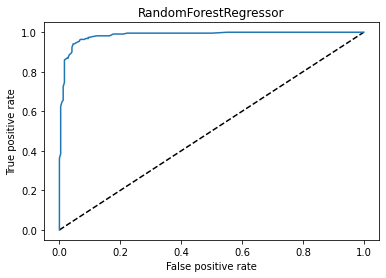

In [118]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='RandomForestRegressor')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('RandomForestRegressor')
plt.show()

I found out best result with RandomForestRegressor by using varius technics. So i will save RandomForestRegressor as my final model.

## Model Saving

In [119]:
import pickle
filename='Predicted_HR_Attrition.pkl'
pickle.dump(rf,open(filename,'wb'))